# Logistic regression model (8 Feb 2019, 4.10pm to 4.30pm)

1. Introduction

    Logistic regression analysis is used to estimate the probability that an instance belongs to a particular class.
    
    Likewise, the logistic regression model sums the weights of the input features and a constant bias term (similar to linear and polynomial regression analyses)
    
    <img src="data/Images/logistic_regression_model.png" width="50%">    
    
    source: http://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/
    
    To implement logistic regression, we need a hypothesis function $h_\theta(x)$, a cost function $J(\theta)$, and a gradient function that computes the partial derivatives of $J(\theta)$.

    In logistic regression, $h_\theta$ is the sigmoid function.  The sigmoid function is bounded between 0 and 1, and produces a value that can be interpreted as a probability.  This value can also be a yes / no answer with a cross-over, or decision boundary, at 0.5:

$$
h_\theta(x) = \frac{1}{1 + e^{ \theta^Tx}}
$$

<img src="data/Images/simple_logistic_regression.png" width="50%">

2. Importing relevant packages, libraries and classes associated with python
    
    * pandas - Open Source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language https://pandas.pydata.org/
    
    * numpy - fundamental package for scientific computing with Python http://www.numpy.org/
    
    * matplotlib.pyplot -  Python 2D plotting library https://matplotlib.org/
    
    * sklearn metrics - module which contains performance metrics etc. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    
    * sklearn.linear_model - module which introduces generalized linear models https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
    
    * sklearn.datasets - package which contains small "cleaned" datasets https://scikit-learn.org/stable/datasets/index.html
    
    * sklearn.preprocessing - package which provides utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for specific estimators https://scikit-learn.org/stable/modules/preprocessing.html
    
    * sklearn.model_selection - Cross-validation: evaluating estimator performance, Tuning the hyper-parameters of an estimator https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

3. Reading in data

   * Using digits data from the use of the load_digits function

In [2]:
# loading in digits data
dataset = load_digits()
print(dataset.data.shape)

X_digits = dataset.data / dataset.data.max() # to normalize all data by the maximum digit
y_digits = dataset.target
df_data = pd.DataFrame(X_digits)
df_data['y'] = y_digits
df_data.head()
#df_data.to_csv('digits_data')
#df_data.describe()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4


4. Data management to split dataset for training and validation

    * Available train_test_split function in sklearn.model_selection can do the splitting
    
      see more information sklearn.model_selection https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    
    * We first use an alternate method to split the dataset


In [3]:
# data management for setting up training and validation dataset
import random
dummy_value = random.random() # generate a random number of between 0.0 and 1.0
print(round(dummy_value,3))
size = len(X_digits)
dummy_pos = int(dummy_value*size)
print(dummy_pos)

X_train = X_digits[:dummy_pos]
y_train = y_digits[:dummy_pos]
X_test = X_digits[dummy_pos:]
y_test = y_digits[dummy_pos:]

0.327
587


5. Model-training to build predictive logistic model

    * Use LogisticRegression function to fit the training data

    * When multi_class is multinomial, we are using softmax regression, or commonly known as multinomial logistic regression. 
    * Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using a limited amount of computer memory. 
    * It is a popular algorithm for parameter estimation in machine learning (‘lbfgs’, ‘newton-cg’, ‘liblinear’, ‘sag’, ‘saga’  ----> different types of solver)

    NOTE THAT if data is binary or solver is liblinear, multinomial multi_class is not available.

In [4]:
# model training
logistic_model = LogisticRegression(solver='newton-cg', max_iter=5000,
                                           multi_class='multinomial')
train_result = logistic_model.fit(X_train,y_train)

6. Model-validation to validate predictive linear model

    * Determine the accuracy of the predictive model by using the score function

In [5]:
# model validation
print(round(train_result.score(X_test,y_test),3))

0.919


# Example on the use of multinomial logistic regression model

* We are only going to use two features from the wine dataset: alcohol and ash.  

* The labels are supplied as an array of data with values from 1 to 3 but we only want a simple regression problem with a yes or no answer, i.e. 0 or 1

HOW TO DO SO? 

* Filter the data set first by reducing them to only include wines with labels 1 or 2.  

* Use scikit-learn label_binarize function, which takes an m-length list with n possible values (two, in this case), and converts it to an m $\times$ n matrix, where each column represents one label with a value of 1, and all others with a value of 0.  

Import relevant libraries, packages and classes, and reading in data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

dataset3 = pd.read_csv('wine_logistic.txt')
dataset3

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [7]:
processed_dataset3 = dataset3[dataset3['class']<=2]
# print(processed_dataset3)
x = processed_dataset3.as_matrix(columns=['alcohol','ash'])
# print(x)
y = label_binarize(processed_dataset3['class'].values,[1,2])[:,0]
# print(y)

C:\Users\Alvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Use train_test_split function in sklearn.model_selection to do the data splitting

In [8]:
x_train, x_test = train_test_split(x, test_size = 0.25)
y_train, y_test = train_test_split(y, test_size = 0.25)

# print(x_train,y_train)
# print(x_test,y_test)

Visualization of training data points

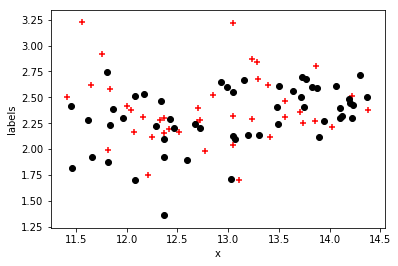

In [9]:
MARKERS = ['+', 'o', 'x']
COLORS = ['r', 'k', 'b']

def plot_points(x, labels):
    for i, label in enumerate(set(labels)):
        points = np.array([x[j,:] for j in range(len(x)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)
        plt.xlabel('x')
        plt.ylabel('labels')

plot_points(x_train,y_train)

Model-training to build predictive logistic model

* Use LogisticRegression function to fit the training data

* When multi_class is multinomial, we are using softmax regression, or commonly known as multinomial logistic regression.

* Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using a limited amount of computer memory. It is a popular algorithm for parameter estimation in machine learning (‘lbfgs’, ‘newton-cg’, ‘liblinear’, ‘sag’, ‘saga’ ----> different types of solver)

NOTE THAT if data is binary or solver is liblinear, multinomial multi_class is not available.

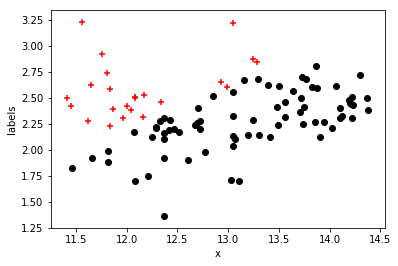

In [10]:
# model training
logistic_model = LogisticRegression(solver='newton-cg', max_iter=5000,
                                           multi_class='multinomial')
train_model = logistic_model.fit(x_train,y_train)
train_result = train_model.predict(x_train)
plot_points(x_train,train_result)

Model-validation to validate predictive linear model

* Determine the accuracy of the predictive model by using the score function
    

1.0


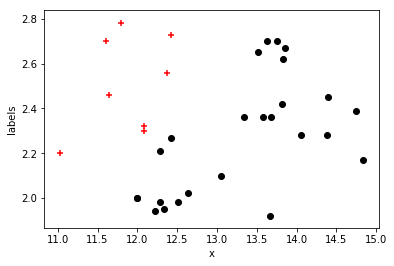

In [11]:
# model validation
validate_result = train_model.predict(x_test)
plot_points(x_test,validate_result)
print(round(train_model.score(x_test,validate_result),3))